In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instant-gratification/sample_submission.csv
/kaggle/input/instant-gratification/train.csv
/kaggle/input/instant-gratification/test.csv


# 1. EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [3]:
train = pd.read_csv("/kaggle/input/instant-gratification/train.csv")
test = pd.read_csv("/kaggle/input/instant-gratification/test.csv")
submission = pd.read_csv("/kaggle/input/instant-gratification/sample_submission.csv")

In [4]:
print(train.shape)
print(test.shape)

(262144, 258)
(131072, 257)


In [5]:
print(train["target"].value_counts())

target
1    131131
0    131013
Name: count, dtype: int64


타깃값의 불균형 문제 없음

<Axes: >

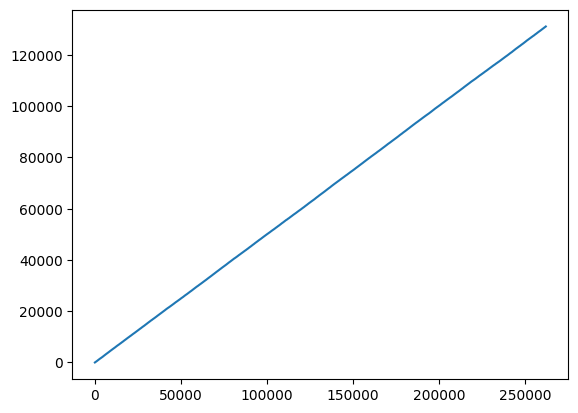

In [6]:
train["target"].cumsum().plot()

타깃값의 누출문제X

In [7]:
train.isnull().sum().sum()

0

결측치X

In [8]:
train.dtypes.value_counts()

float64    255
int64        2
object       1
Name: count, dtype: int64

In [9]:
train.select_dtypes(include=["int64", "object"]).head()

,id,wheezy-copper-turtle-magic,target
0,707b395ecdcbb4dc2eabea00e4d1b179,99,0
1,5880c03c6582a7b42248668e56b4bdec,52,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,230,1
3,e350f17a357f12a1941f0837afb7eb8d,78,0
4,a8f910ea6075b6376af079055965ff68,497,0


In [10]:
train_columns= [c for c in train.columns if c not in ["id", "target"]]
train[train_columns].nunique()
#id,target을 제외한 train의 unique한 행 개수

muggy-smalt-axolotl-pembus              254322
dorky-peach-sheepdog-ordinal            254588
slimy-seashell-cassowary-goose          254356
snazzy-harlequin-chicken-distraction    254576
frumpy-smalt-mau-ordinal                254330
                                         ...  
jumpy-thistle-discus-sorted             254261
muggy-turquoise-donkey-important        254366
blurry-buff-hyena-entropy               254345
bluesy-chocolate-kudu-fepid             254329
gamy-white-monster-expert               254192
Length: 256, dtype: int64

In [11]:
print(np.where(train[train_columns].nunique()<250000))
#대부분의 열이 25만개이상의 유니크값 가짐 -> 25만개 이하의 유니크값 가지는 열 확인

(array([146]),)


In [12]:
train_columns[146]

'wheezy-copper-turtle-magic'

In [13]:
print(train["wheezy-copper-turtle-magic"].nunique())
# 확연하게 작은 unique값 가지는 열

512


In [14]:
train["wheezy-copper-turtle-magic"].value_counts().mean()
#해당열은 512개의 유니크한 값을 가지며 유니크한 값이 평균 512개의 개수를 가집

512.0

In [15]:
train_columns= [c for c in train_columns if c not in ["id", "target", "wheezy-copper-turtle-magic"]]

describe_train = train[train_columns].describe().T.drop("count",axis=1)
cmap = sns.diverging_palette(5,250,as_cmap=True)
describe_train.T.style.background_gradient(cmap,axis=1)
#-15~-20의 최솟값부터 +15~+20까지의  최댓값을 보통 가짐

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

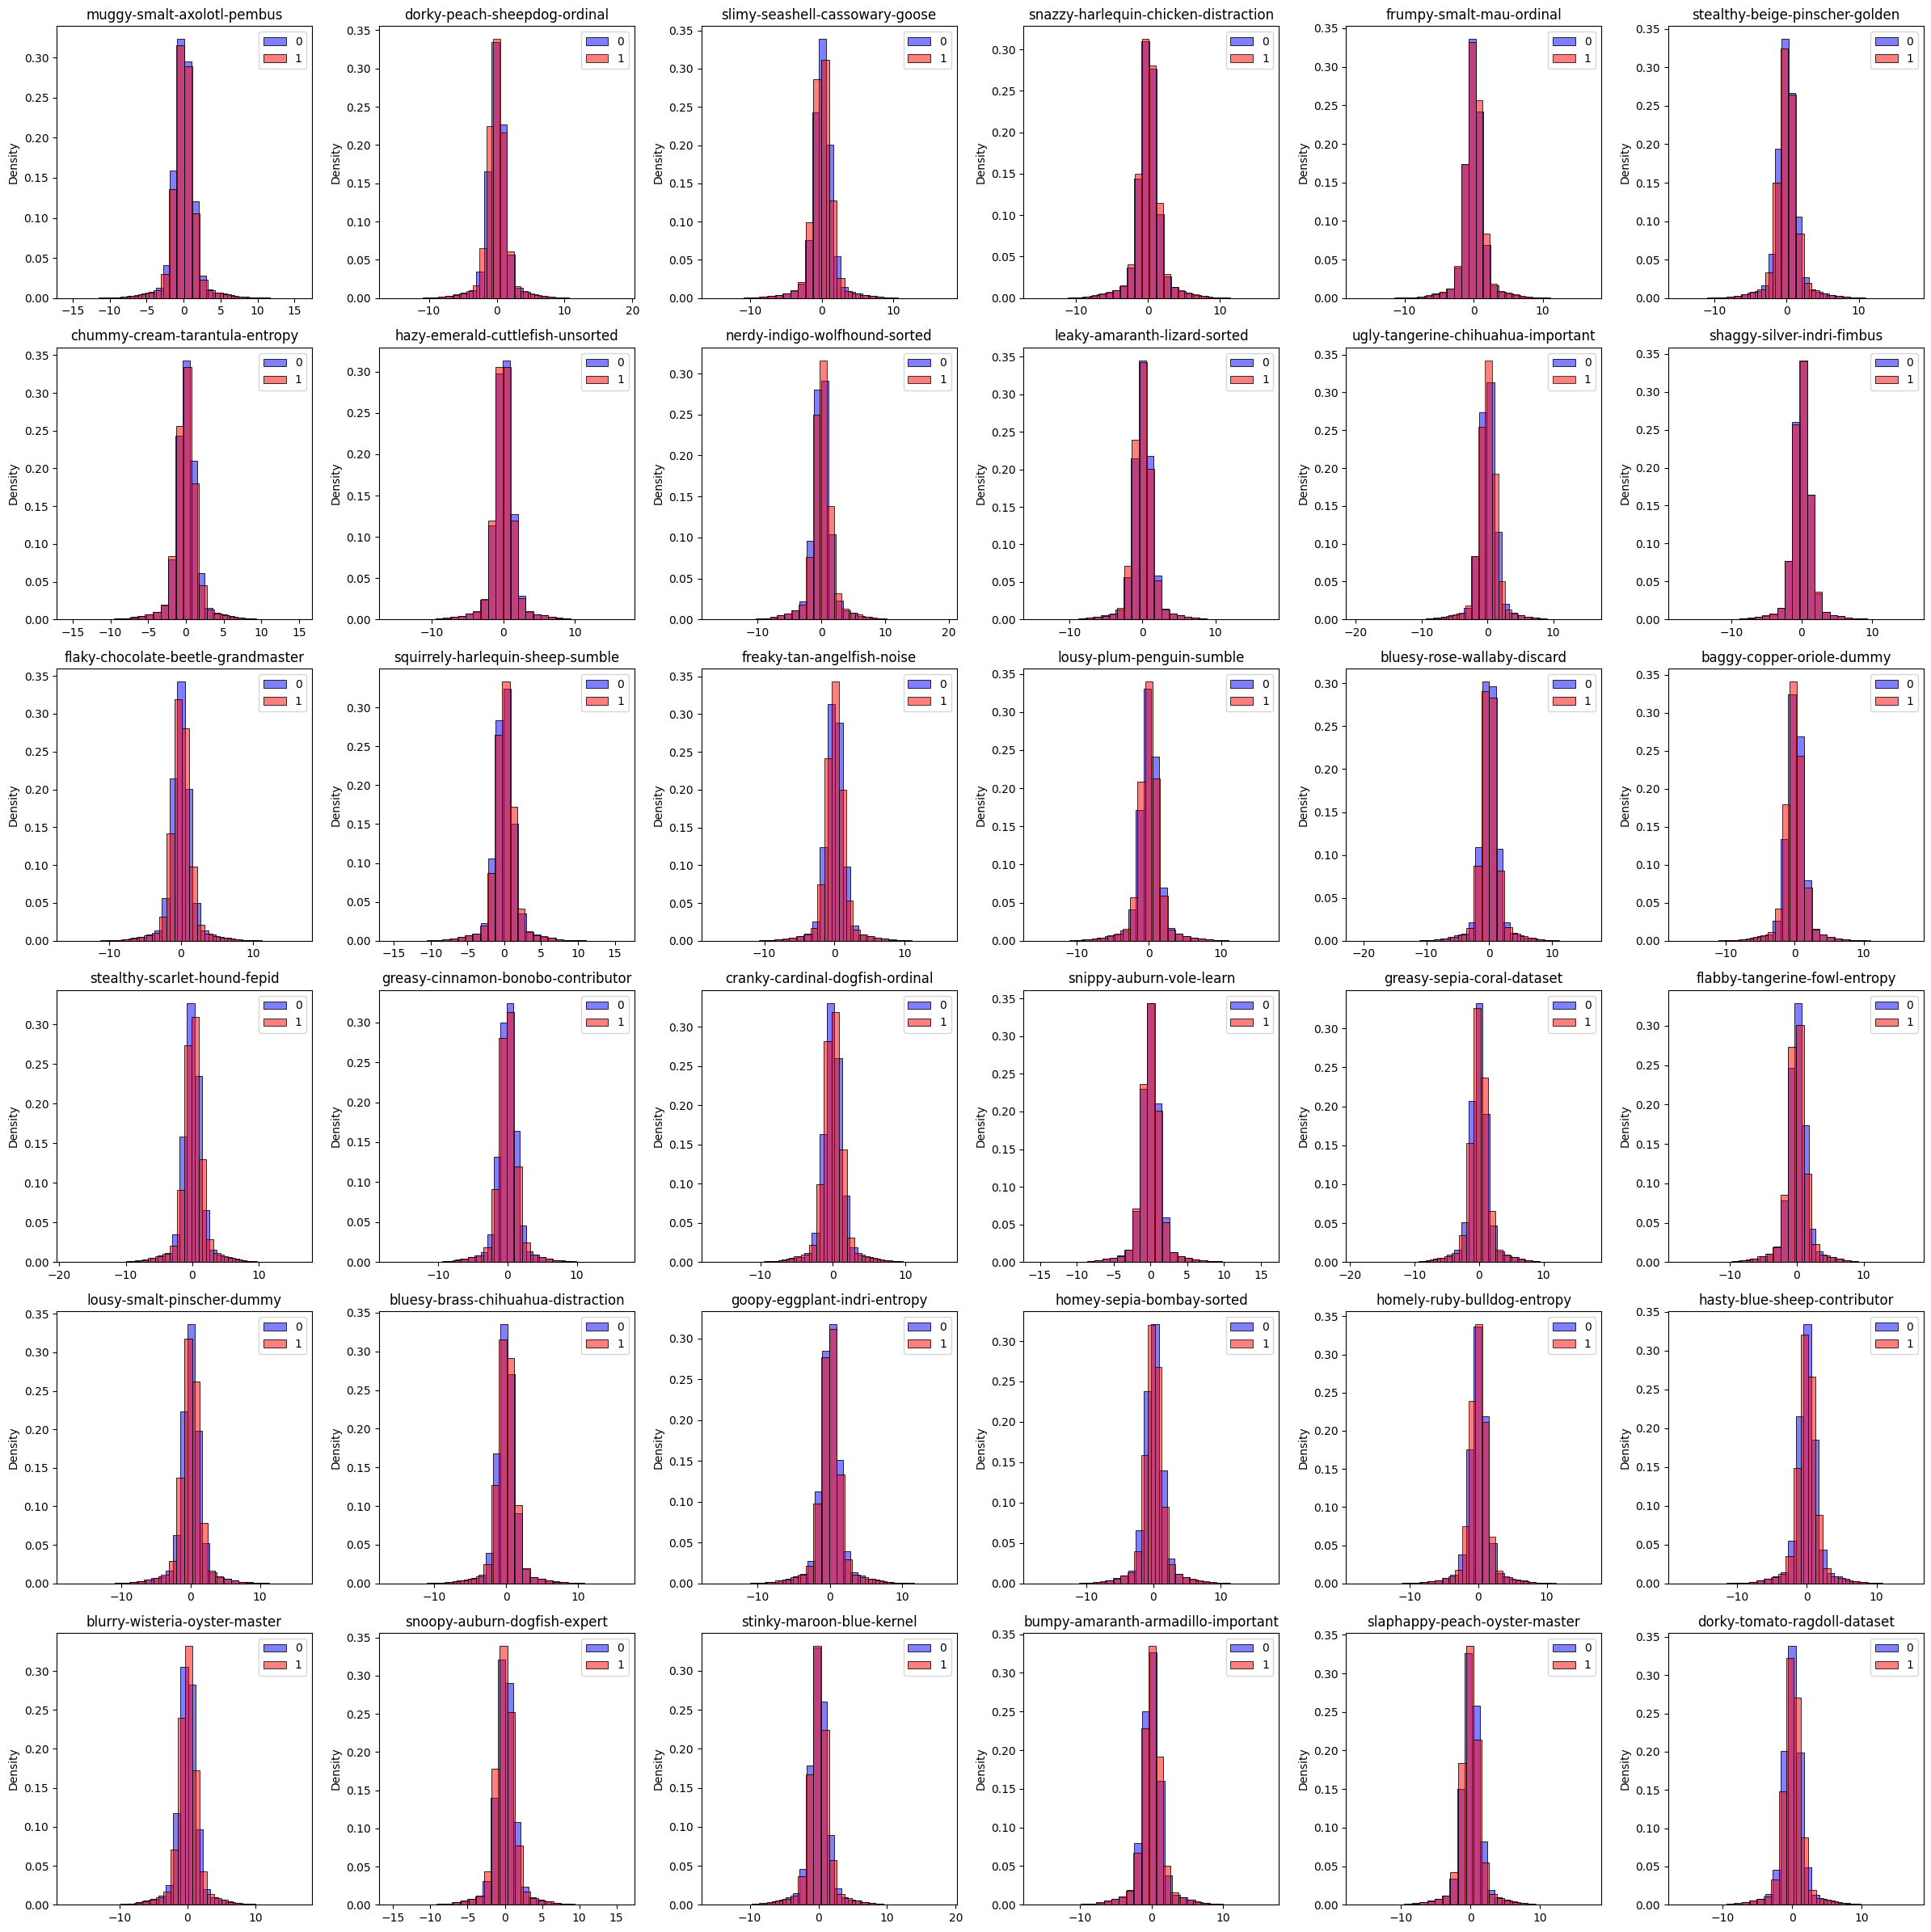

In [16]:
train_columns = [c for c in train.columns if c not in ["id", "target"]]
target_0_df = train.loc[train["target"]==0]
target_1_df = train.loc[train["target"]==1]

plt.figure(figsize=(24,24))
for index,name in enumerate(train_columns[:36]):
    plt.subplot(6,6,index+1)
    sns.histplot(target_0_df[name], color='blue', label='0', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(target_1_df[name], color='red', label='1', kde=False, stat="density", bins=30, alpha=0.5)
    plt.title(name)
    plt.xlabel("")
    plt.legend(["0","1"])
plt.tight_layout()
plt.show()

# 2. Stacking